<a href="https://colab.research.google.com/github/SHEHAN-120/linear-regression-from-scratch-pytorch/blob/main/pytorch_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
torch.__version__

'2.6.0+cu124'

In [ ]:
X=torch.linspace(0,10,100).reshape(-1,1)
y=2*X+1+torch.randn(X.size())

In [ ]:
X

tensor([[ 0.0000],
        [ 0.1010],
        [ 0.2020],
        [ 0.3030],
        [ 0.4040],
        [ 0.5051],
        [ 0.6061],
        [ 0.7071],
        [ 0.8081],
        [ 0.9091],
        [ 1.0101],
        [ 1.1111],
        [ 1.2121],
        [ 1.3131],
        [ 1.4141],
        [ 1.5152],
        [ 1.6162],
        [ 1.7172],
        [ 1.8182],
        [ 1.9192],
        [ 2.0202],
        [ 2.1212],
        [ 2.2222],
        [ 2.3232],
        [ 2.4242],
        [ 2.5253],
        [ 2.6263],
        [ 2.7273],
        [ 2.8283],
        [ 2.9293],
        [ 3.0303],
        [ 3.1313],
        [ 3.2323],
        [ 3.3333],
        [ 3.4343],
        [ 3.5354],
        [ 3.6364],
        [ 3.7374],
        [ 3.8384],
        [ 3.9394],
        [ 4.0404],
        [ 4.1414],
        [ 4.2424],
        [ 4.3434],
        [ 4.4444],
        [ 4.5455],
        [ 4.6465],
        [ 4.7475],
        [ 4.8485],
        [ 4.9495],
        [ 5.0505],
        [ 5.1515],
        [ 5.

In [ ]:
y

tensor([[ 1.8186],
        [ 1.7712],
        [ 0.8663],
        [ 1.6306],
        [ 4.0242],
        [ 1.1900],
        [ 1.1212],
        [ 2.7324],
        [ 3.3326],
        [ 1.4680],
        [ 3.3358],
        [ 4.9281],
        [ 3.2883],
        [ 4.1023],
        [ 6.0433],
        [ 3.9379],
        [ 3.9963],
        [ 4.9809],
        [ 5.6486],
        [ 6.0274],
        [ 5.2994],
        [ 4.9357],
        [ 5.0474],
        [ 7.0131],
        [ 6.2905],
        [ 6.8742],
        [ 5.3649],
        [ 5.7492],
        [ 6.9218],
        [ 6.5799],
        [ 6.5416],
        [ 6.7394],
        [ 7.1914],
        [ 6.9541],
        [ 7.9392],
        [ 8.6692],
        [ 8.0618],
        [ 9.1425],
        [ 8.3583],
        [ 8.0570],
        [ 8.5040],
        [ 9.2362],
        [ 9.2357],
        [ 8.7762],
        [ 9.0042],
        [11.4337],
        [11.8702],
        [10.9646],
        [10.8359],
        [11.2693],
        [11.2768],
        [10.1653],
        [11.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X.numpy(),y.numpy(),test_size=0.2,random_state=42)

In [ ]:
X_train=torch.tensor(X_train,dtype=torch.float32)
X_test=torch.tensor(X_test,dtype=torch.float32)
y_train=torch.tensor(y_train,dtype=torch.float32)
y_test=torch.tensor(y_test,dtype=torch.float32)

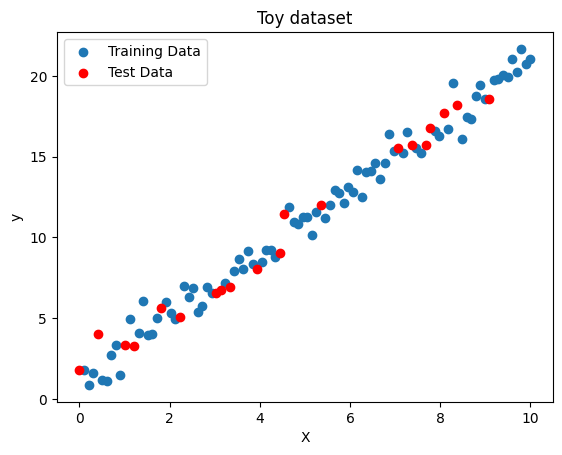

In [ ]:
plt.scatter(X_train.numpy(),y_train.numpy(),label='Training Data')
plt.scatter(X_test.numpy(),y_test.numpy(),label='Test Data',color='red')
plt.title('Toy dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
import torch.nn as nn

In [ ]:
class LRModel(nn.Module):
  def __init__(self,input_dim,output_dim):
    super(LRModel,self).__init__()
    self.linear=nn.Linear(input_dim,output_dim)

  def forward(self,x):
    out=self.linear(x)
    return out

In [ ]:
input_dim=1
output_dim=1
lr_model=LRModel(input_dim,output_dim)

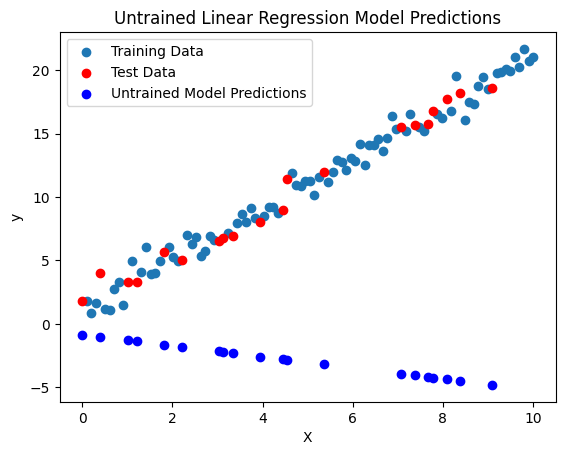

In [ ]:
with torch.no_grad():
  untrained_pred=lr_model(X_test)

plt.scatter(X_train.numpy(),y_train.numpy(),label='Training Data')
plt.scatter(X_test.numpy(),y_test.numpy(),label='Test Data',color='red')

plt.scatter(X_test.numpy(),untrained_pred.numpy(),label='Untrained Model Predictions',color='blue')

plt.title('Untrained Linear Regression Model Predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [ ]:
with torch.no_grad():
  untrained_pred=lr_model(X_test)

In [ ]:
criterion=nn.MSELoss()

In [ ]:
loss=criterion(untrained_pred,y_test)

In [ ]:
loss

tensor(213.1452)

In [ ]:
import torch.optim as optim

In [ ]:
optimizer=optim.SGD(lr_model.parameters(),lr=0.01)

In [ ]:
num_epochs=100
loss_values=[]

for epoch in range(num_epochs):
  lr_model.train()
  optimizer.zero_grad()
  outputs=lr_model(X_train)
  loss=criterion(outputs,y_train)
  loss.backward()
  optimizer.step()

  loss_values.append(loss.item())

  if(epoch+1)%10==0:
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 1.1736
Epoch [20/100], Loss: 1.1199
Epoch [30/100], Loss: 1.0710
Epoch [40/100], Loss: 1.0266
Epoch [50/100], Loss: 0.9863
Epoch [60/100], Loss: 0.9496
Epoch [70/100], Loss: 0.9163
Epoch [80/100], Loss: 0.8861
Epoch [90/100], Loss: 0.8586
Epoch [100/100], Loss: 0.8336


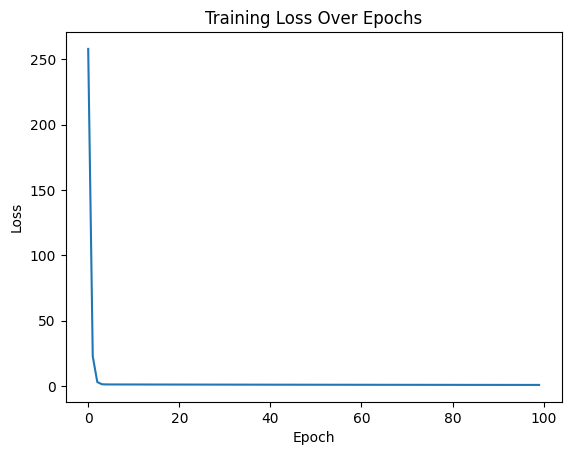

In [ ]:
plt.plot(range(num_epochs),loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()

In [ ]:
lr_model.eval()
with torch.no_grad():
  predictions=lr_model(X_test)

In [ ]:
predictions

tensor([[18.0339],
        [11.5712],
        [15.2334],
        [ 9.8478],
        [ 9.6324],
        [ 8.5553],
        [ 4.8931],
        [17.3877],
        [ 2.3080],
        [ 0.1538],
        [ 4.0314],
        [ 6.6165],
        [15.8797],
        [ 7.2628],
        [19.5419],
        [ 1.0155],
        [16.5260],
        [16.7414],
        [ 2.7389],
        [ 6.8319]])

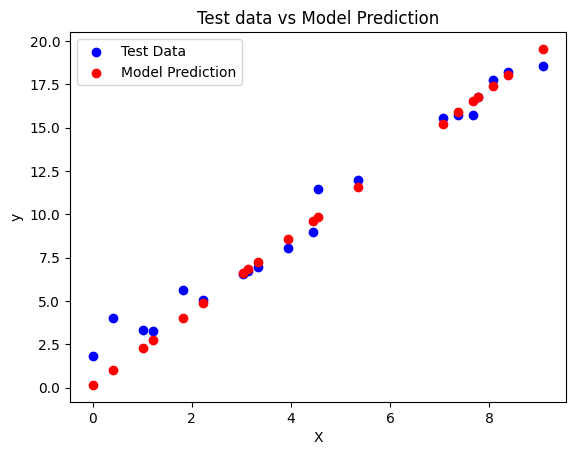

In [ ]:
plt.scatter(X_test.numpy(),y_test.numpy(),label='Test Data',color='blue')
plt.scatter(X_test.numpy(),predictions.numpy(),label='Model Prediction',color='red')
plt.title('Test data vs Model Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()